In [47]:
import pandas as pd

data = pd.read_csv("processedData.csv")

data = data.dropna()
leng = len(data.index)

print('Number of rows =', leng)

data.head()

Number of rows = 998


,Year,Type of Crime,Date,Time,Latitude,Longitude,Location,Arrest
0,2017,DECEPTIVE PRACTICE,3/1/2018,3:52:00 PM,42.012293,-87.699714,CURRENCY EXCHANGE,True
1,2017,CRIMINAL DAMAGE,3/1/2018,3:52:00 PM,41.918712,-87.765511,JAIL / LOCK-UP FACILITY,True
2,2017,OTHER OFFENSE,3/1/2018,3:52:00 PM,41.814670,-87.690727,APARTMENT,True
3,2017,DECEPTIVE PRACTICE,3/1/2018,3:52:00 PM,41.938581,-87.765831,CURRENCY EXCHANGE,True
4,2017,CRIM SEXUAL ASSAULT,3/1/2018,3:52:00 PM,41.895805,-87.683159,STREET,True


In [69]:
from sklearn.model_selection import train_test_split

y = data['Arrest']
X_1 = data.drop('Arrest',axis = 1)
X_2 = X_1.drop('Location',axis = 1)
X_3 = X_2.drop('Time',axis = 1)
X_4 = X_3.drop('Date',axis = 1)
X = X_4.drop('Type of Crime',axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=1)

Best hyperparameter, maxdepth = 1
Test Accuracy = 0.7633333333333333


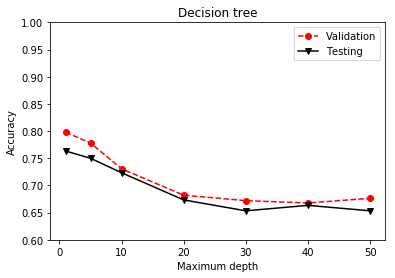

In [70]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1, 5, 10, 20, 30, 40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test,Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Best hyperparameter, C = 0.1
Test Accuracy = 0.7633333333333333


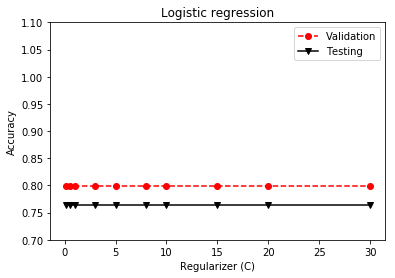

In [71]:
from sklearn import linear_model

regularizers = [0.1, 0.5, 1, 3, 5, 8, 10, 15, 20,30]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

np.random.seed(1)
for C in regularizers:
    clf = linear_model.LogisticRegression(C= C, solver='liblinear', penalty='l1')
    scores = cross_val_score( clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train )
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test,Y_predTest)
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.1])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [72]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators =numEstimators )
clf.fit(X_train, Y_train )
Y_pred = clf.predict(X_test)
print('Test Accuracy =', accuracy_score(Y_test,Y_pred))

Test Accuracy = 0.7366666666666667


(array([989.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.02304546, 0.12085464, 0.21866382, 0.316473  , 0.41428218,
        0.51209136, 0.60990054, 0.70770972, 0.8055189 , 0.90332808,
        1.00113726]),
 <a list of 10 Patch objects>)

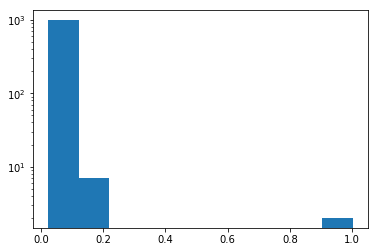

In [73]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

knn = 100
x = knn+1
nbrs = NearestNeighbors(n_neighbors = x).fit(X)
distances, indices = nbrs.kneighbors(X)
ax = plt.axes(yscale='log')
ax.hist(distances[:,knn])

In [74]:
dist = distances[:,knn]
outlier = np.flipud(np.argsort(dist))
sort_dist = np.flipud(np.sort(dist))

p = pd.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,28.0,1.001137
1,31.0,1.000662
2,480.0,0.191655
3,486.0,0.183873
4,735.0,0.175100


Area under ROC = 0.4333


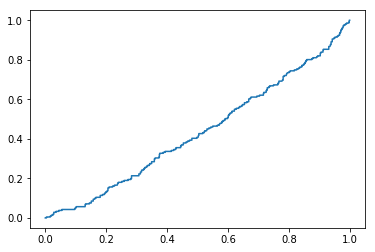

In [77]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

labels = (y == True)

dist = distances[:,knn]
fpr, tpr, thresholds = roc_curve(labels, dist )
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print('Area under ROC = %.4f' % (roc_auc))

In [114]:
from surprise import Dataset
from surprise import Reader
import pandas as pd

data_l = pd.read_csv("final_data_2.csv")

reader = Reader(line_format= 'user item rating' , sep=',', rating_scale=(0,172))
data_final = Dataset.load_from_df(data_l[['Type of Crime','Arrest','Count']], reader=reader)
data_final.raw_ratings[:5]

[('DECEPTIVE PRACTICE', True, 8.0, None),
 ('CRIMINAL DAMAGE', True, 7.0, None),
 ('OTHER OFFENSE', True, 21.0, None),
 ('CRIM SEXUAL ASSAULT', True, 2.0, None),
 ('WEAPONS VIOLATION', True, 17.0, None)]

In [111]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data_final, test_size = 0.5)
a = 20
b = 200
algo = NMF(n_factors = a, n_epochs = b)
algo.fit(trainset)

In [112]:
from surprise import accuracy

pred = algo.test(testset)
accuracy.rmse(pred), accuracy.mae(pred)

RMSE: 58.5525
MAE:  37.8277


(58.552525104056556, 37.82770752843118)

In [116]:
for i in range(15):
    print(pred[i])

user: BURGLARY   item: 0          r_ui = 66.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: ASSAULT    item: 0          r_ui = 60.00   est = 2.63   {'was_impossible': False}
user: ARSON      item: 0          r_ui = 2.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: WEAPONS VIOLATION item: 1          r_ui = 16.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: KIDNAPPING item: 0          r_ui = 1.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: NARCOTICS  item: 1          r_ui = 38.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: BATTERY    item: 0          r_ui = 143.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: ROBBERY    item: 0          r_ui = 57.00   est = 15.06   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: THEFT      

In [117]:
from surprise import Dataset
from surprise import Reader
import pandas as pd

data_l = pd.read_csv("final_data.csv")

reader = Reader(line_format= 'user item rating' , sep=',', rating_scale=(0,172))
data_final = Dataset.load_from_df(data_l[['Location','Arrest','Count']], reader=reader)
data_final.raw_ratings[:5]

[('CURRENCY EXCHANGE', True, 4.0, None),
 ('JAIL / LOCK-UP FACILITY', True, 3.0, None),
 ('APARTMENT', True, 33.0, None),
 ('STREET', True, 44.0, None),
 ('ALLEY', True, 6.0, None)]

In [118]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data_final, test_size = 0.5)
a = 20
b = 200
algo = NMF(n_factors = a, n_epochs = b)
algo.fit(trainset)

In [119]:
from surprise import accuracy

pred = algo.test(testset)
accuracy.rmse(pred), accuracy.mae(pred)


RMSE: 10.8944
MAE:  9.3650


(10.894370986049823, 9.36497495926473)

In [120]:
for i in range(10):
    print(pred[i])

user: TAVERN/LIQUOR STORE item: 0          r_ui = 3.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: GROCERY FOOD STORE item: 1          r_ui = 6.00   est = 0.00   {'was_impossible': False}
user: CHA HALLWAY/STAIRWELL/ELEVATOR item: 0          r_ui = 1.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: CONVENIENCE STORE item: 1          r_ui = 1.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: RESIDENCE PORCH/HALLWAY item: 0          r_ui = 14.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: AIRCRAFT   item: 0          r_ui = 1.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: MEDICAL/DENTAL OFFICE item: 0          r_ui = 2.00   est = 16.38   {'was_impossible': True, 'reason': 'User and item are unkown.'}
user: COMMERCIAL / BUSINESS OFFICE item: 1          r_ui = 1.00   est = 0.00   {'was_imp